In [1]:
from bs4 import BeautifulSoup as BS
import urllib.request
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
% matplotlib inline
import seaborn as sns

import geopandas as gpd
from shapely.geometry import Point

import datetime

In [2]:
request = urllib.request.Request("https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900")
result = urllib.request.urlopen(request)
resulttext = result.read()
soup = BS(resulttext, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [3]:
# Grab earthquakes table from wiki page, as well as columns and rows to convert to DF
table_html = soup.find_all('table', class_="sortable wikitable")

table = table_html[0]

table_headers = table.find_all("th")
columns = [th.text for th in table_headers]

rows = []
for tr in table.find_all("tr")[1:]:
    row_data = [td.text for td in tr.find_all("td")]
    rows.append(row_data)

In [4]:
# Create earthquakes DF
earthquakes = pd.DataFrame(rows, columns = columns)
earthquakes = earthquakes.replace("", np.nan)

earthquakes.head(10)

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
0,1900-05-11 17:23,Japan,38.700,141.100,5,7.0 MJMA,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-07-12 06:25,Turkey,40.300,43.100,NaN,5.9 Muk,NaN,NaN,NaN,140,NaN,NaN
2,1900-10-29 09:11,Venezuela,11.000,-66.000,0,7.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
3,1901-02-15 00:00,China,26.000,100.100,0,6.5 Ms,NaN,NaN,NaN,NaN,NaN,NaN
4,1901-03-31 07:11,Bulgaria,43.400,28.700,NaN,6.4 Muk,NaN,NaN,NaN,4,NaN,NaN
5,1901-08-09 09:23,Japan,40.500,142.500,35,7.2 Mw,T,NaN,NaN,NaN,NaN,NaN
6,1901-11-15 20:15,New Zealand (see 1901 Cheviot earthquake),-43.000,173.000,0,6.8 Ms,NaN,NaN,NaN,1,NaN,NaN
7,1902-01-30 14:01,Japan,40.500,141.300,35,6.9 Ms,NaN,NaN,NaN,1,NaN,NaN
8,1902-02-13 09:39,Azerbaijan,40.700,48.600,15,6.9 Muk,NaN,NaN,NaN,86,NaN,NaN
9,1902-03-09 07:46,Turkey,40.700,33.600,NaN,5.5 Muk,NaN,NaN,NaN,4,NaN,NaN


In [5]:
unnecessary_symbols = "(\[\d+\]|\(.*\)|\*|\+|\,)"

earthquakes["Other Source Deaths"] = earthquakes["Other Source Deaths"].str.replace(unnecessary_symbols, "")

earthquakes[earthquakes["Lat"].isnull()]

,Origin (UTC),Present-day country and link to Wikipedia article,Lat,Long,Depth (km),Magnitude,Secondary Effects,PDE Shaking Deaths,PDE Total Deaths,Utsu Total Deaths,EM-DAT Total Deaths,Other Source Deaths
439,1966-04-25 23:22,Uzbekistan (see 1966 Tashkent earthquake),NaN,NaN,NaN,5 ML,NaN,NaN,NaN,NaN,10[7]|,None
1319,2008-10-06 16:30,China (see 2008 Damxung earthquake),NaN,NaN,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1320,2008-10-28 23:09,Pakistan (see 2008 Ziarat earthquake),NaN,NaN,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,215
1323,2009-07-09 11:19,China (see 2009 Yunnan earthquake),NaN,NaN,NaN,5.7 Mw,NaN,NaN,NaN,NaN,NaN,NaN
1324,2009-08-10 20:07,Japan (see 2009 Shizuoka earthquake),NaN,NaN,NaN,6.4 Mw,NaN,NaN,NaN,NaN,NaN,1
1325,2009-09-02 07:55,Indonesia (see 2009 West Java earthquake),NaN,NaN,NaN,7.0 Mw,NaN,NaN,NaN,NaN,NaN,79
1326,2009-09-29 17:48,Samoa (see 2009 Samoa earthquake and tsunami),NaN,NaN,8.1,8.1 Mw,NaN,NaN,NaN,NaN,NaN,189
1327,2009-09-30 10:16,Indonesia (see 2009 Padang earthquake),NaN,NaN,NaN,7.6 Mw,NaN,NaN,NaN,NaN,NaN,1115
1330,2010-03-08 02:32,Turkey (see 2010 Elâzığ earthquake),NaN,NaN,NaN,6.1 Mw,NaN,NaN,NaN,NaN,NaN,42
1331,2010-03-11 14:39,Chile (see 2010 Pichilemu earthquake),NaN,NaN,NaN,6.9 Mw,L,NaN,NaN,NaN,NaN,1


In [6]:
"""There are son lat/lng values in the dataframe that didn't exist on the wiki page, so we looked up the coords
    and assigned them to their appropriate location
    
    First index is LNG, second is LAT
"""
in_nan = {
    439: [69.13, 41.16], 1319: [90.302, 29.759], 1320: [67.484, 30.569], 1323: [101.086, 25.619], 1324: [138.276, 34.778], 1325: [107.328, -7.778], 1326: [-171.87, -15.53], 1327: [99.97, 0.71], 1330: [40.03, 38.79], 1331: [-72.13, -34.301], 1332: [96.629, 33.165], 1333: [172.7012, -43.5834], 1334: [97.994, 24.71], 1336: [99.949, 20.705]
}

for loc, coords in in_nan.items():
    earthquakes.iloc[loc, earthquakes.columns.get_loc('Long')] = coords[0]
    earthquakes.iloc[loc, earthquakes.columns.get_loc('Lat')] = coords[1]

assert earthquakes[earthquakes["Lat"].isnull()].empty == True
assert earthquakes[earthquakes["Long"].isnull()].empty == True

In [7]:
"""There is a unique case where the lat/lng as well as depth values are '?' or '??'"""
question_index = earthquakes[earthquakes["Lat"] == "?"].index

earthquakes.iloc[question_index, earthquakes.columns.get_loc("Lat")] = 21.4
earthquakes.iloc[question_index, earthquakes.columns.get_loc("Long")] = 42.1
earthquakes.iloc[question_index, earthquakes.columns.get_loc("Depth (km)")] = 6

In [8]:
"""There can potentially be multiple values within the Other Source Deaths column. So, this is grabbing the 
    values and determining the mean
"""
means = []
for row in earthquakes["Other Source Deaths"]:
    if isinstance(row, str):
        int_list = row.strip().split(" ")
        total = sum(list(map(int, int_list)))
        
        mean = total / len(int_list)
        means.append(mean)
    else:
        means.append(row)
        
earthquakes["Other Source Deaths"] = means

In [9]:
"""There are some bad characters in this column, so this regex just grabs the int"""
for col in ['EM-DAT Total Deaths', 'Magnitude']:
    earthquakes[col] = earthquakes[col].str.extract('(\d+\.\d*)', expand=True)

In [10]:
"""Transforms the column in the dataframe to a float32 column, rather than the object type. 
    Also fills all NaN values to 0.
"""
def nan_to_int(df, columns, value=0, inplace=True):    
    for col in columns:        
        df[col].fillna(value=value, inplace=inplace)
        df[col] = pd.to_numeric(df[col], downcast='float')
        
columns_to_convert = ['PDE Total Deaths', 'PDE Shaking Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Magnitude']
nan_to_int(df=earthquakes, columns=columns_to_convert)

earthquakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 12 columns):
Origin (UTC)                                         1340 non-null object
Present-day country and link to Wikipedia article    1340 non-null object
Lat                                                  1340 non-null object
Long                                                 1340 non-null object
Depth (km)                                           1250 non-null object
Magnitude                                            1340 non-null float32
Secondary Effects                                    373 non-null object
PDE Shaking Deaths                                   1340 non-null float32
PDE Total Deaths                                     1340 non-null float32
Utsu Total Deaths                                    1340 non-null float32
EM-DAT Total Deaths                                  1340 non-null float32
Other Source Deaths                                  37 non-null float64
dt

In [11]:
# Creating a new column 'deaths' that is the max of these four columns
subdf = earthquakes[["PDE Total Deaths", "Utsu Total Deaths", "EM-DAT Total Deaths", "Other Source Deaths"]]
earthquakes["deaths"] = subdf.max(axis = 1)

In [12]:
# rename columns
earthquakes.columns = ["UTC", "Country", "lat", "lng", "Depth_km", "Mag", "Secondary_Effects", "PDE_Shaking_Deaths", "PDE_Deaths", "Utsu_Deaths", "EM-DAT_Deahts", "Other_Deaths", "Max_Deaths"]

In [13]:
spaces_parens = "(\s\(.*)"
earthquakes['Country']= earthquakes['Country'].str.replace(spaces_parens, "")

In [14]:
# Create the apropriate datetime columns with padding for javascript visuals
earthquakes["UTC"] = pd.to_datetime(earthquakes["UTC"])
earthquakes["Year"] = pd.DatetimeIndex(earthquakes["UTC"]).year
earthquakes["Month"] = pd.DatetimeIndex(earthquakes["UTC"]).month.map("{:02}".format)
earthquakes["Day"] = pd.DatetimeIndex(earthquakes["UTC"]).day.map("{:02}".format)

In [15]:
earthquakes.to_json("JSONs_for_TP/earthquakes_original.json")

[Text(0,0,'China'),
 Text(0,0,'Indonesia'),
 Text(0,0,'Turkey'),
 Text(0,0,'Iran'),
 Text(0,0,'Japan'),
 Text(0,0,'Peru'),
 Text(0,0,'Taiwan'),
 Text(0,0,'Mexico'),
 Text(0,0,'Chile'),
 Text(0,0,'Greece'),
 Text(0,0,'Philippines'),
 Text(0,0,'Italy'),
 Text(0,0,'United States'),
 Text(0,0,'Afghanistan'),
 Text(0,0,'Pakistan'),
 Text(0,0,'India'),
 Text(0,0,'Colombia'),
 Text(0,0,'Algeria'),
 Text(0,0,'Ecuador'),
 Text(0,0,'Papua New Guinea'),
 Text(0,0,'Guatemala'),
 Text(0,0,'South Africa'),
 Text(0,0,'Russian Federation'),
 Text(0,0,'Argentina'),
 Text(0,0,'Burma')]

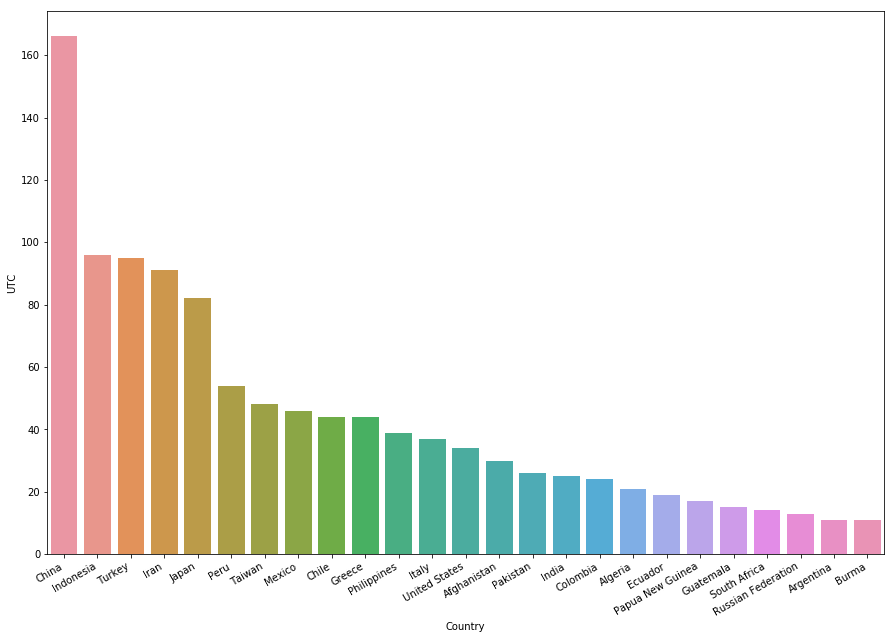

In [16]:
quakes_country_25 = earthquakes.groupby("Country").agg(len).reset_index().nlargest(25, columns="UTC")

f, ax = plt.subplots(figsize=(15, 10))
#plt.ylabel('Number of Quakes')
quake_count = sns.barplot(x='Country', y='UTC', data=quakes_country_25)
quake_count.set_xticklabels(quake_count.get_xticklabels(), rotation=30, ha="right")

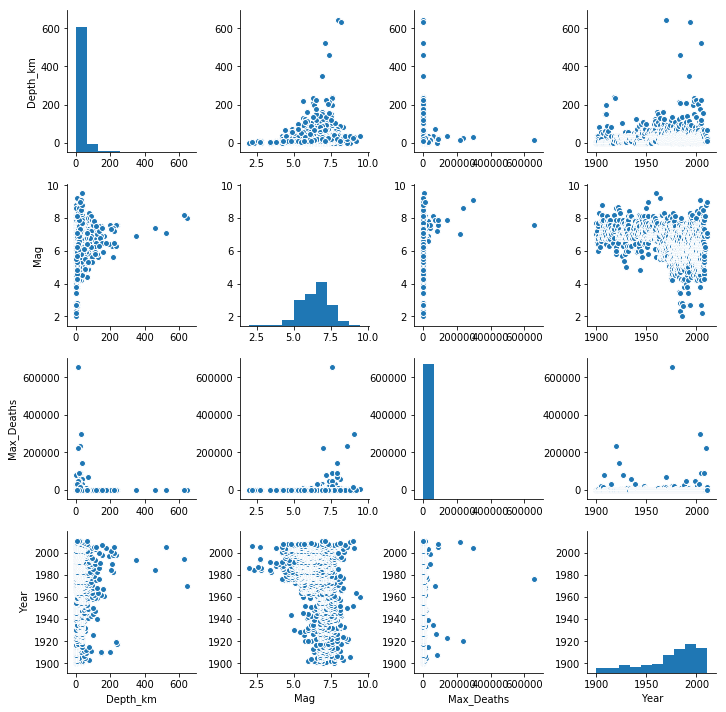

In [17]:
"""Trying to find any correlation between these columns. Most interesting find is between Depth and Mag"""
earthquakes_cont = earthquakes[["Depth_km", "Mag", "Max_Deaths", "Year"]]
earthquakes_cont = earthquakes_cont.replace("?", np.nan)
earthquakes_cont["Depth_km"] = pd.to_numeric(earthquakes_cont["Depth_km"])
earthquakes_cont = earthquakes_cont.dropna()

sns.pairplot(earthquakes_cont, dropna=True)

In [18]:
# Total deaths by country
occurrence_death = earthquakes[['Country', 'Max_Deaths']].groupby(['Country']).agg(['sum', 'count'])
occurrence_death.columns=['Total Deaths', 'Frequency of Earthquakes']

EQ_Casualities = occurrence_death.sort_values(['Frequency of Earthquakes'], ascending=False)
EQ_Casualities.head()

,Total Deaths,Frequency of Earthquakes
Country,,
China,1141840.0,166
Indonesia,343306.0,96
Turkey,123061.0,95
Iran,160664.0,91
Japan,182920.0,82


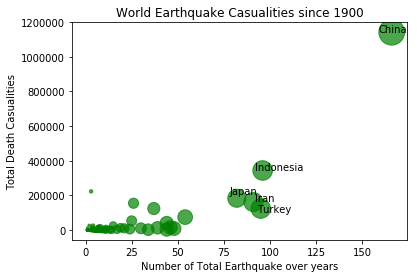

In [19]:
# Base size of dots based on frequency
np_death = np.array(EQ_Casualities['Frequency of Earthquakes'])
np_death = np_death*4

# Find correlation between Frequency and Total Deaths
plt.scatter(EQ_Casualities['Frequency of Earthquakes'], EQ_Casualities['Total Deaths'], s=np_death, color='green', alpha=0.7)

# Hard code some labels
plt.text(159, 1143382.0, 'China')
plt.text(93, 103304.0, 'Turkey')
plt.text(92, 167960.0, 'Iran')
plt.text(92, 343574.0, 'Indonesia')
plt.text(78, 205148.0, 'Japan')

plt.xlabel('Number of Total Earthquake over years')
plt.ylabel('Total Death Casualities')

plt.title('World Earthquake Casualities since 1900')

plt.show()

In [20]:
# convert lat and lng to numeric, then create geometry df
earthquakes["lat"] = pd.to_numeric(earthquakes["lat"])
earthquakes["lng"] = pd.to_numeric(earthquakes["lng"])

earthquakes.drop("UTC", inplace=True, axis=1)

geometry = [Point(xy) for xy in zip(earthquakes.lng, earthquakes.lat)]
crs = {"init": "epsg:4326"} 
earthquakes_gdf = gpd.GeoDataFrame(earthquakes, crs=crs, geometry=geometry)

In [21]:
# Bring in volcano data
request = urllib.request.Request("http://volcano.oregonstate.edu/volcano_table")
result = urllib.request.urlopen(request)
soup_v = BS(result.read(), 'html.parser')

In [22]:
# Grab table
table_html = soup_v.find_all('table', class_="views-table cols-6")
table = table_html[0]

# Grab columns from table
table_headers_v = table.find_all("th")
columns_v = [th.text for th in table_headers_v]

# Grab rows from table
rows_v = []
for tr in table.find_all("tr")[1:]:
    row_data = [td.text for td in tr.find_all("td")]
    rows_v.append(row_data)

In [23]:
# Create volcanos df from columns and rows we just scraped
volcanoes = pd.DataFrame(rows_v, columns=columns_v)
volcanoes.columns = ["Name", "Country", "Type", "lat", "lng", "Elevation"]

# Cleaning a few rows in the df
new_lines_spaces = "(\n|\n\s)"
volcanoes = volcanoes.replace(to_replace=new_lines_spaces, value="", regex=True)

# Cleaning up some extra spaces 
volcanoes["lat"] = volcanoes["lat"].str.strip()
volcanoes["lng"] = volcanoes["lng"].str.strip()
volcanoes["Elevation"] = volcanoes["Elevation"].str.strip()

In [24]:
# Convert appropriate rows to numeric
volcanoes["lat"] = pd.to_numeric(volcanoes["lat"])
volcanoes["lng"] = pd.to_numeric(volcanoes["lng"])
volcanoes["Elevation"] = pd.to_numeric(volcanoes["Elevation"])

In [25]:
# Create a geometry column for graphing later
geometry = [Point(xy) for xy in zip(volcanoes.lng, volcanoes.lat)]
crs = {"init": "epsg:4326"} 
volcanoes_gdf = gpd.GeoDataFrame(volcanoes, crs=crs, geometry=geometry)

In [26]:
request = urllib.request.Request("http://vents-data.interridge.org/ventfields_list_all")
result = urllib.request.urlopen(request)
soup_vent = BS(result.read(), 'html.parser')

In [27]:
# Grab the table
table_vent_html = soup_vent.find_all('table', class_="views-table cols-8")
table_vent = table_vent_html[0]

# Grab al of the columns
table_headers_vent = table_vent.find_all("th")
columns_vent = [th.text for th in table_headers_vent]

# Grab the rows
rows_vent = []
for tr in table_vent.find_all("tr")[1:]:
    row_data = [td.text for td in tr.find_all("td")]
    rows_vent.append(row_data)

In [28]:
# Create a new vents df with the columns and rows we just obtained
vents = pd.DataFrame(rows_vent, columns = columns_vent)
vents.head()

,Vent Field Name ID,Activity,Tectonic Setting,Region,Latitude,Longitude,Maximum or Single Reported Depth,Year and How Discovered
0,\n13 N Ridge Site,"\nactive, confirmed",\nback-arc spreading center,\nMariana Trough,\n 13.0987,\n 143.6886,\n 2900,"\n 2000 deep-tow camera (later, sam..."
1,\n94SO2,"\nactive, inferred",\nback-arc spreading center,\nNew Hebrides back-arc,\n -19.4000,\n 169.9000,\n 980,\n 1994 towed camera with temperatu...
2,"\nAAR KR1, Mujin","\nactive, inferred",\nmid-ocean ridge,\nSEIR,\n -62.1000,\n 158.8000,\n 2100,\n 2011 plume and biological sample...
3,\nAAR KR2,"\nactive, inferred",\nmid-ocean ridge,\nSEIR,\n -60.0000,\n 152.5000,\n 3200,\n 2011 plume only
4,\nABE,"\nactive, confirmed",\nback-arc spreading center,\nLau Basin,\n -20.7619,\n -176.1910,\n 2220,\n 2004 AUV ABE; 2004 plume only on...


In [29]:
# Some basic cleaning of the rows
vents = vents.replace(to_replace=new_lines_spaces, value="", regex=True)

# Renaming columns
vents.columns = ["Name", "Activity", "Tectonic Setting", "Region", "lat", "lng", "Depth", "Year&Discovered"]

# Removing all extra spaces from these rows
vents["lat"] = vents["lat"].str.strip()
vents["lng"] = vents["lng"].str.strip()
vents["Year&Discovered"] = vents["Year&Discovered"].str.strip()

# Turn appropriate columns qto numeric
cols = ["lat", "lng", "Depth"]
vents[cols] = vents[cols].apply(pd.to_numeric)#, errors='coerce')

# Create a new geometry column to plot with lata
geometry_vent = [Point(xy) for xy in zip(vents.lng, vents.lat)]
crs = {"init": "epsg:4326"} 
vents_gdf = gpd.GeoDataFrame(vents, crs=crs, geometry=geometry_vent)

In [30]:
# Import plates and countries geojson to plot
plates_gdf = gpd.read_file("MR_Data/PB2002_plates.json")
countries_gdf = gpd.read_file("MR_Data/countries.geojson")

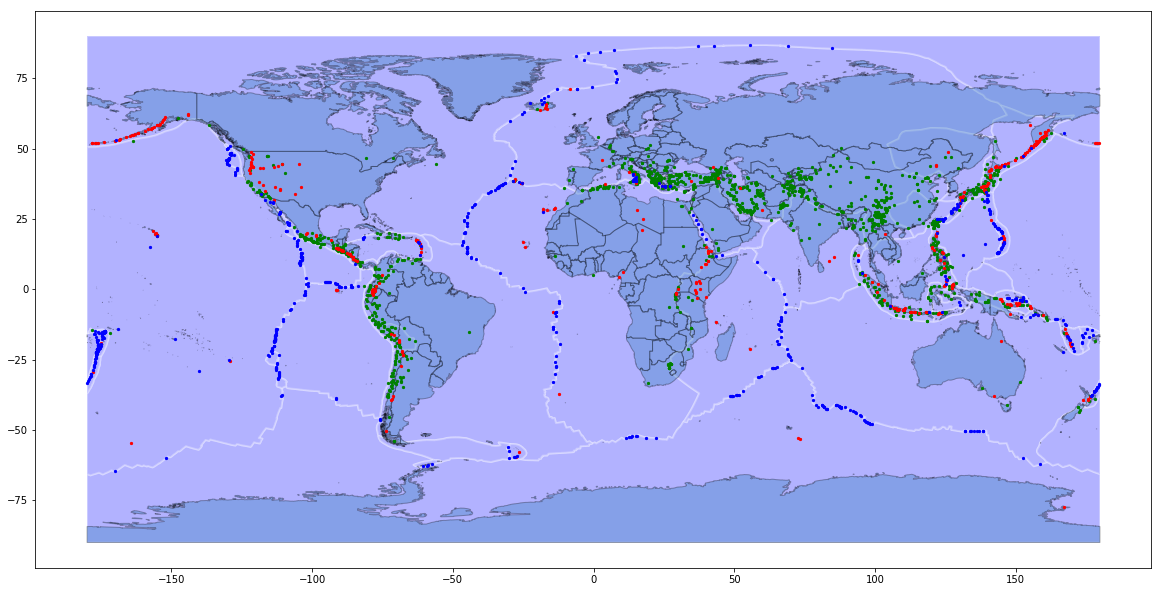

In [31]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')

# Countries and plates
plates_gdf.plot(ax=ax, color='blue', edgecolor='white', alpha=0.3, lw=2.0)
countries_gdf.plot(ax=ax, edgecolor='black', alpha=0.3)

# all points (earthquakes, volcanoes, and vents)
earthquakes_gdf.plot(ax=ax, markersize=5, color="green")
volcanoes_gdf.plot(ax=ax, markersize=5, color="red")
vents_gdf.plot(ax=ax, markersize=5, color="blue")